In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
from abc import ABC, abstractmethod


class BaseStochasticMotion(ABC):
    def __init__(self, amount, mu, sigma, n, T=1):
        self.d = amount
        self.mu = mu
        self.sigma = sigma
        self.n = n
        self.T = T
        self.B = np.zeros(shape=(1, amount))
        self.times = np.linspace(0, T, n)
        self.dt = self.times[1] - self.times[0]
        self._fitted = False

    def generate(self):
        for t in range(self.n - 1):
            dB = self.calculate_delta(t)
            self.B = np.concatenate((self.B, self.B[t, :].reshape(1, -1) + dB), axis=0)

        self._fitted = True

    @abstractmethod
    def calculate_delta(self, t):
        pass

    def plot(self):
        if not self._fitted:
            return

        _, ax = plt.subplots(figsize=(16, 5), dpi=100)
        ax.plot(self.times, self.B)


class BrownianMotion(BaseStochasticMotion):

    def calculate_delta(self, t):
        return self.mu * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=(1, self.d))


class GeometricBrownianMotion(BaseStochasticMotion):

    def calculate_delta(self, t):
        return self.mu * self.B[t, :].reshape(1, -1) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=(1, self.d))


class OrnsteinMotion(BaseStochasticMotion):

    def calculate_delta(self, t):
        return (self.mu - self.B[t, :].reshape(1, -1)) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=(1, self.d))


Brownian motion formula:

$$ dx = \mu(x, t)dt + \sigma(x, t)dz  $$
where $ \mu(x, t) $ and $ \sigma(x, t) $ are constants

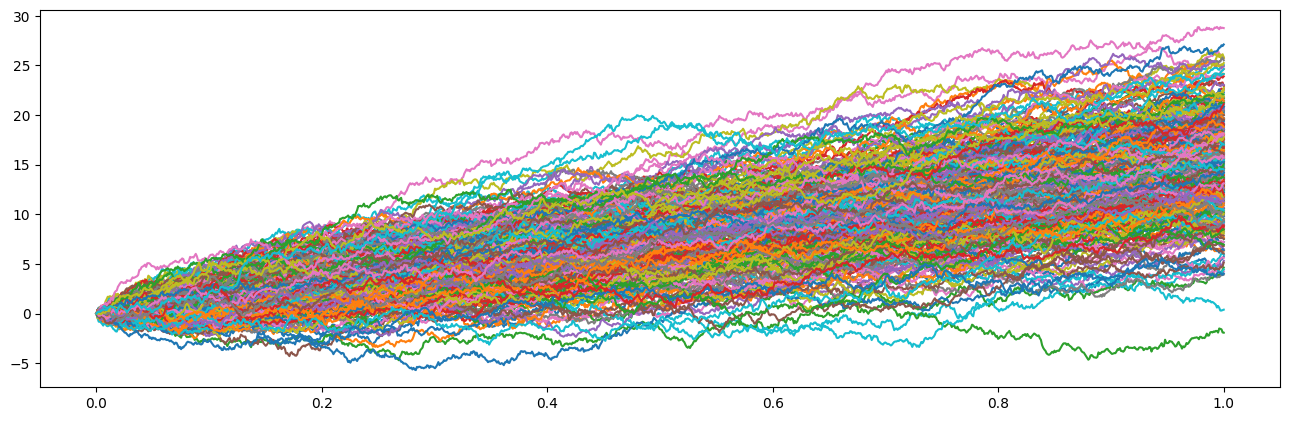

In [153]:
brownian = BrownianMotion(amount=300, mu=15, sigma=5, n=1000)
brownian.generate()
brownian.plot()

Geometric brownian motion:

$$ dx = \mu xdt + \sigma dz  $$


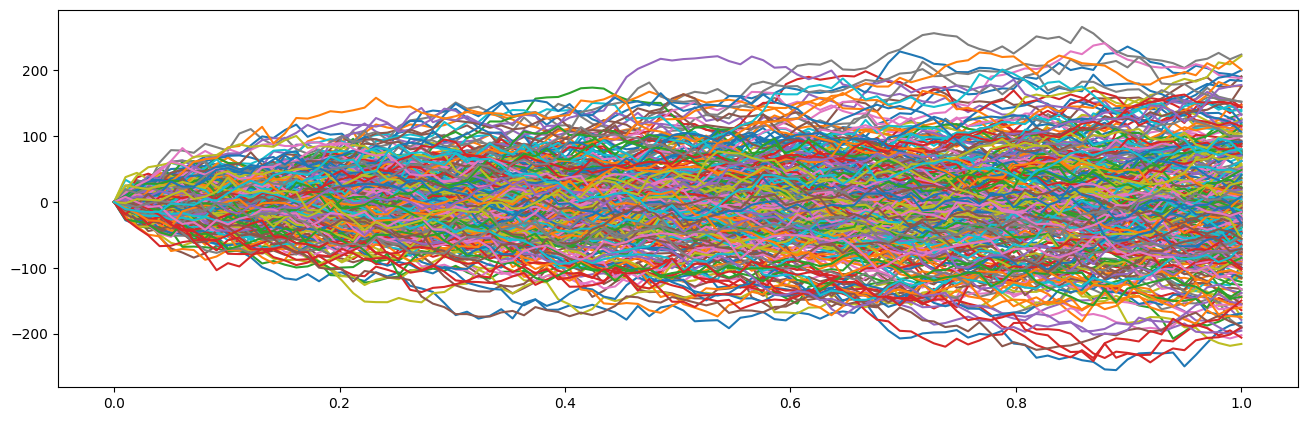

In [154]:
geometric = GeometricBrownianMotion(amount=300, mu=-0.2, sigma=100, n=100)
geometric.generate()
geometric.plot()

Ornstein–Uhlenbeck process

$$ dx = (\mu - x)dt + \sigma dz  $$

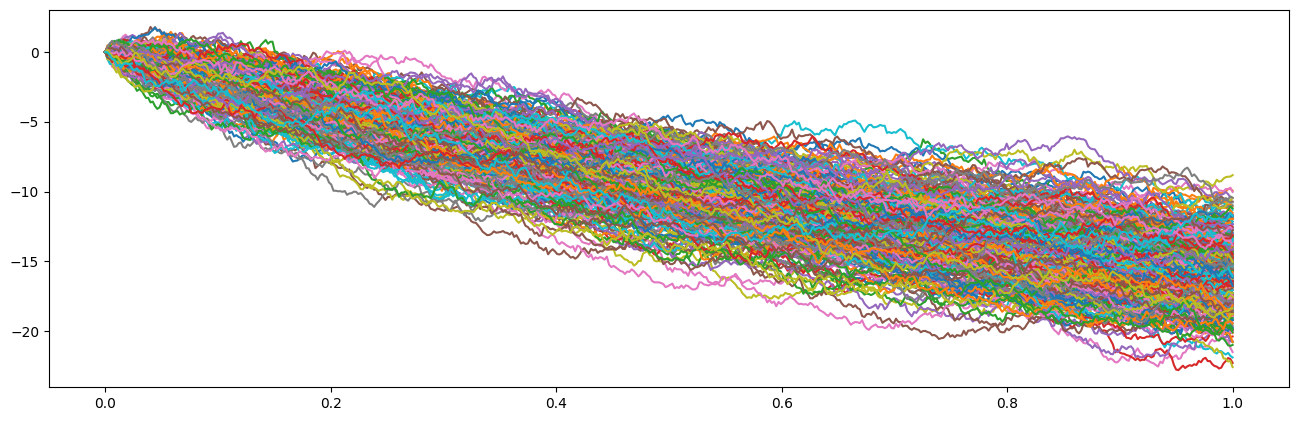

In [155]:
ornstein = OrnsteinMotion(amount=300, mu=-25, sigma=4, n=500)
ornstein.generate()
ornstein.plot()